# Tests JSA calculation class

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
from matplotlib.ticker import MaxNLocator

from topdc_calc import topdc_calc

#### Import the dispersion parameters

In [2]:
#Dispersion import 

dispdata=np.load('disp_data.npy',allow_pickle=True).item()
omf=dispdata['omf']
triplet_neff=dispdata['triplet_neff']
omp=dispdata['omp']
pump_neff=dispdata['pump_neff']
wp_cutoff=9.8  #Pump mode cutoff frequency in 10^14 rad/s

test=topdc_calc(omf,triplet_neff,omp,pump_neff,wp_cutoff)

In [3]:
# Declaration of variables

c0=3 # Velocity of light in vacuum in um/(1e-14 s)
L=300000 # Waveguide length in um ->10000 um=1 cm

wf0=test.w_pm(13)   # Triplet phase-matching frequency in 10^14 rad/s (The input parameter 13  is the initial guess for the triplet central frequency--> You can check this by plotting the dispersion of the pump and triplet modes) 
wp0=3*wf0   # Pump phase-matching frequency in 10^14 rad/s 

In [4]:
print('Triplet central frequency: '+str(round(wf0,2))+' [x10^14 rad/s]')
print('Triplet central wavelength: '+str(round(2*np.pi*c0/wf0,5))+' um')
print('Pump central frequency: '+str(round(wp0,2))+' [x10^14 rad/s]')
print('Pump central wavelength: '+str(round(2*np.pi*c0/wp0,5))+' um')

Triplet central frequency: 13.7 [x10^14 rad/s]
Triplet central wavelength: 1.37627 um
Pump central frequency: 41.09 [x10^14 rad/s]
Pump central wavelength: 0.45876 um


#### Evaluation of the JSA

We are going to filter outside the frequencies $[11.5,15]\times~10^{14}$ rad/s.

In [5]:
wlow=11.5 # Filter lower limit
whigh=15  # Filter higher limit
jsa_data=test.topdc_scaled_auto(L,wp0,wlow,whigh)  # Evaluation of the jsa calculation function
print('Third order dispersion of the triplet mode: '+str(test.beta3_f(wf0)*1e3)+' [fs^3/um]')
print('Third order dispersion of the pump mode: '+str(test.beta3_p(wp0)*1e3)+' [fs^3/um]')

Zeroth-order phase-matching (L/2)Δk=5.329070518200751e-10
Relative slowness s=1/vp-1/vf=1.7678895546935358e-05 [1/(10^8 m/s)]
Group velocity dispersion of the triplet mode: 0.021901719214517668 [fs^2/um]
Group velocity dispersion of the pump mode: -0.006399378811028367 [fs^2/um]


Third order dispersion of the triplet mode: 0.21269126555778334 [fs^3/um]
Third order dispersion of the pump mode: 0.1106340609729646 [fs^3/um]


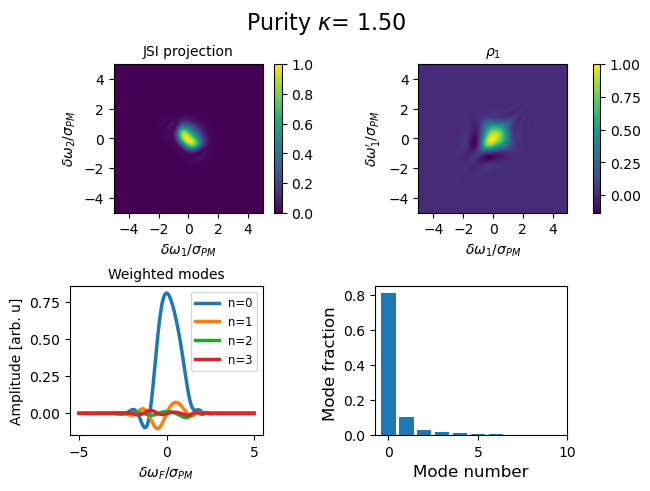

In [6]:
jsa_data.plotter_scaled()

#### Triplet photon rate

In [7]:
# Pump pulse duration of the intensity envelope
sigmap=test.pm_bw(L,wf0)
tau=np.sqrt(4*np.log(2))/sigmap  # FWHM pulse duration Units: 10^-14 seg
print('Pump pulse duration: '+str(tau*10)+' fs.')


# Nonlinear parameter
gammafff=1.19e5 #Nonlinear parameter in units [10^-14 s / um J] (For its calculation, see notebook nonlinear_parameter.ipynb)
hbar=1.054571817e-20 # Reduced Planck constant in units [J*10^-14s]
pavg=0.4 #Average pump power per pulse in Watt
omf=jsa_data.omega*sigmap # We need to multiply by sigmap, because omf is the frequency vector scaled by sigmap, then in the original frequencies dwi=sigma*domf
jsa_vol=np.sum(jsa_data.jsa**2)*(omf[1]-omf[0])**3

# Triplet photon rate
Rfff=(1/(6*np.pi**2))*((gammafff*L)**2)*((hbar*wf0)**2)*(pavg/(hbar*wp0))*(1/(np.sqrt(np.pi)*sigmap))*jsa_vol
print('Triplet rate: '+str(Rfff)+' Hz')

Pump pulse duration: 38.07479072799993 fs.
Triplet rate: 0.10449881750466845 Hz


#### Data export

In [8]:
freq=np.linspace(10,16,100)
difn=[test.neff_p(3*x)-test.neff_f(x) for x in freq]
difvg=[test.vg_p(3*x)-test.vg_f(x) for x in freq]

In [ ]:
dispdict={
    "tag":"36GeO2_rco_849nm_rcl_2340p86nm",
    "omp":omp,
    "pump_neff":test.neff_p(omp),
    "omp":omf,
    "triplet_neff":test.neff_f(omf),
    "pump_vg":test.vg_p(omp),
    "triplet_vg":test.vg_f(omf),
    "freq":freq,
    "difn":difn,
    "difvg":difvg,
    "delk":test.delk0(omf)
}
# savemat("Data_export/36GeO2_rco_849nm_rcl_2340p86nm_dispersion.mat",dispdict)

In [10]:
jsidict={
    "tag":"36GeO2_rco_849nm_rcl_2340p86nm",
    "wf0":jsa_data.wf0,
    "sigma":jsa_data.sigmap,
    "omf":jsa_data.omega,
    "jsi_proj":jsa_data.jsa_proj
}

# savemat("Data_export/36GeO2_rco_849nm_rcl_2340p86nm_jsi_proj.mat",jsidict)

In [11]:
rhodict={
    "tag":"36GeO2_rco_849nm_rcl_2340p86nm",
    "wf0":jsa_data.wf0,
    "sigma":jsa_data.sigmap,
    "omf":jsa_data.omega,
    "rho":jsa_data.density_matrix
}
# savemat("Data_export/36GeO2_rco_849nm_rcl_2340p86nm_rho.mat",rhodict)

In [12]:
eigendict={
    "tag":"36GeO2_rco_849nm_rcl_2340p86nm",
    "wf0":jsa_data.wf0,
    "sigma":jsa_data.sigmap,
    "snumbers":jsa_data.eigen_values,
    "smodes":jsa_data.eigen_modes
}
# savemat("Data_export/36GeO2_rco_849nm_rcl_2340p86nm_eigendecomposition.mat",eigendict)